# Big data analysis using dask
## Dataset: NYC Taxi Trip Records

In [37]:
import dask.dataframe as dd
import pandas as pd
import plotly.express as px
import dask
import dask.dataframe as dd

# Use threaded scheduler to avoid Windows errors
dask.config.set(scheduler="threads")






In [38]:
df=dd.read_parquet('yellow_tripdata_2023-01.parquet')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [47]:
df.shape[0].compute

<bound method FrameBase.compute of <dask_expr.expr.Scalar: expr=(Filter(frame=Assign(frame=Assign(frame=Assign(frame=Assign(frame=Filter(frame=Filter(frame=DropnaFrame(frame=ReadParquetFSSpec(67589ce)), predicate=DropnaFrame(frame=ReadParquetFSSpec(67589ce))['trip_distance'] > 0), predicate=(Filter(frame=DropnaFrame(frame=ReadParquetFSSpec(67589ce)), predicate=DropnaFrame(frame=ReadParquetFSSpec(67589ce))['trip_distance'] > 0))['fare_amount'] > 0))))), predicate=(Assign(frame=Assign(frame=Assign(frame=Assign(frame=Filter(frame=Filter(frame=DropnaFrame(frame=ReadParquetFSSpec(67589ce)), predicate=DropnaFrame(frame=ReadParquetFSSpec(67589ce))['trip_distance'] > 0), predicate=(Filter(frame=DropnaFrame(frame=ReadParquetFSSpec(67589ce)), predicate=DropnaFrame(frame=ReadParquetFSSpec(67589ce))['trip_distance'] > 0))['fare_amount'] > 0))))))['year'] == 2023)).size() // 23, dtype=int64>>

In [40]:
df.info()


<class 'dask.dataframe.dask_expr.DataFrame'>
Columns: 19 entries, VendorID to airport_fee
dtypes: datetime64[us](2), float64(12), int64(4), string(1)

In [5]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
npartitions=1,,,,,,,,,,,,,,,,,,
,float64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [48]:
df.shape[0].compute()


2934149

In [42]:
df=df.dropna()
df=df[df.trip_distance>0]
df=df[df.fare_amount>0]

In [43]:
df["pickup_date"] = df.tpep_pickup_datetime.dt.date
df["pickup_hour"] = df.tpep_pickup_datetime.dt.hour
df["day_of_month"] = df.tpep_pickup_datetime.dt.day
df["year"] = df.tpep_pickup_datetime.dt.year





In [45]:
df=df[df["year"]==2023]

In [46]:
df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour,day_of_month,year
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,0.00,0.0,1.0,14.30,2.5,0.00,2023-01-01,0,1,2023
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,4.00,0.0,1.0,16.90,2.5,0.00,2023-01-01,0,1,2023
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,15.00,0.0,1.0,34.90,2.5,0.00,2023-01-01,0,1,2023
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,...,0.00,0.0,1.0,20.85,0.0,1.25,2023-01-01,0,1,2023
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,3.28,0.0,1.0,19.68,2.5,0.00,2023-01-01,0,1,2023


In [49]:
trips_per_day = (
    df.groupby("day_of_month")
      .size()
      .reset_index()
      .rename(columns={0: "total_trips"})
)

trips_pd = trips_per_day.compute()
trips_pd.head()


,day_of_month,total_trips
0,1,71356
1,2,62867
2,3,81898
3,4,91119
4,5,96879


In [50]:
daily_revenue = (
    df.groupby("day_of_month")
      .fare_amount.sum()
      .reset_index()
      .rename(columns={"fare_amount":"total_revenue"})
)

revenue_pd = daily_revenue.compute()
revenue_pd.head()


,day_of_month,total_revenue
0,1,1562376.33
1,2,1398993.38
2,3,1655302.93
3,4,1744004.50
4,5,1790227.21


In [51]:
hourly_trips = (
    df.groupby("pickup_hour")
      .size()
      .reset_index()
      .rename(columns={0:"trips"})
)

hourly_pd = hourly_trips.compute()
hourly_pd





,pickup_hour,trips
0,0,80570
1,1,56263
2,2,39288
3,3,25379
4,4,16015
5,5,16332
6,6,40602
7,7,81179
8,8,110096
9,9,125105


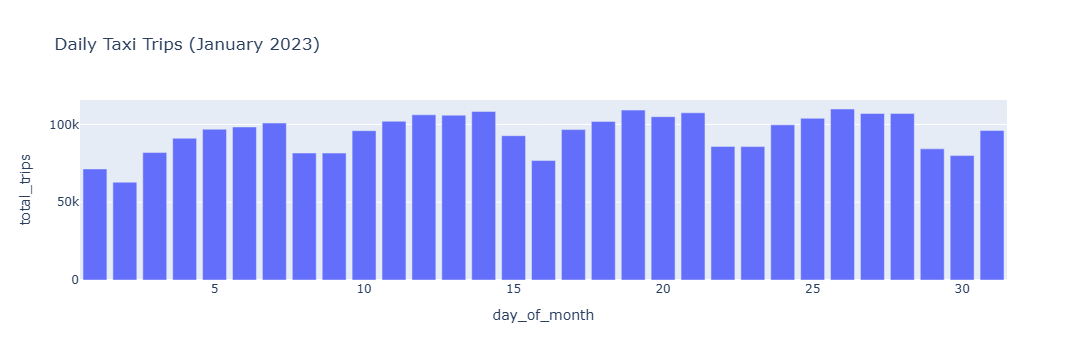

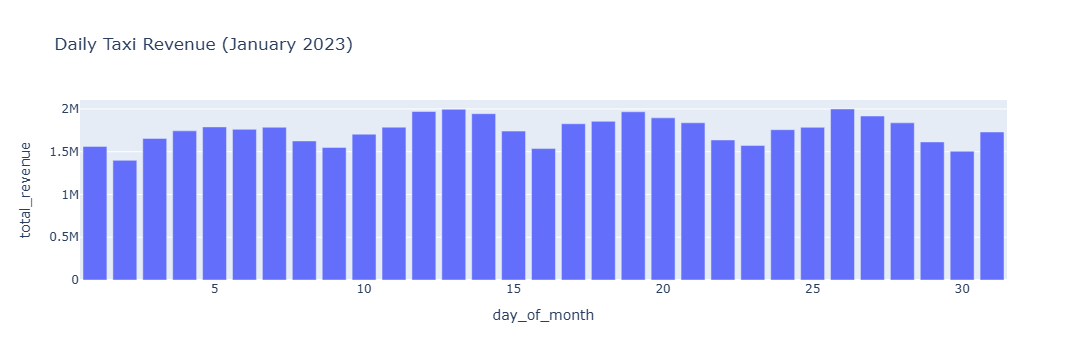

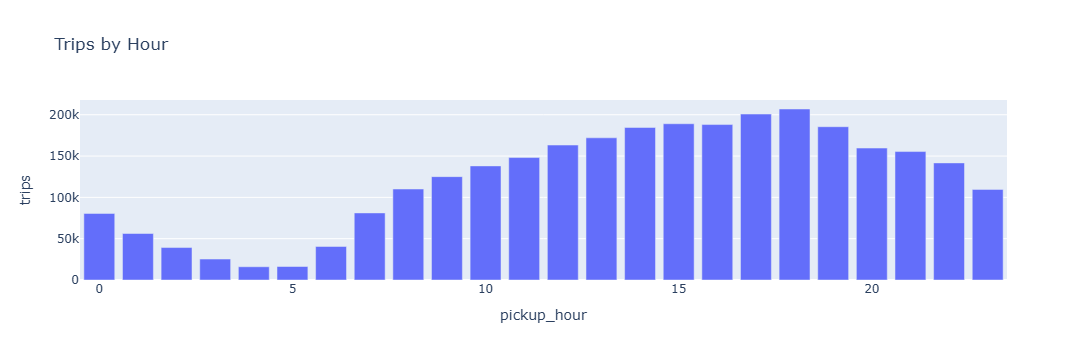

In [54]:
fig1 = px.bar(
    trips_pd,
    x="day_of_month",
    y="total_trips",
    title="Daily Taxi Trips (January 2023)"
)

fig2 = px.bar(
    revenue_pd,
    x="day_of_month",
    y="total_revenue",
    title="Daily Taxi Revenue (January 2023)"
)

fig3 = px.bar(
    hourly_pd,
    x="pickup_hour",
    y="trips",
    title="Trips by Hour"
)

fig1.show()
fig2.show()
fig3.show()